Using Vader Sentiment
---

In [1]:
#importing the important modules
import re
import nltk
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

#reading the CSV file containing the feedback and creating a dataframe

Feedback=pd.read_csv(r'D:\Documents\Dossiers du travail\Technical Excellence\Sentimental Analysis\data.csv')
df=pd.DataFrame(Feedback)
vader_sentiment=pd.DataFrame()

# #Creating a function to pre-process the sentence text

# def	preprocess_text(text):
#     text	=	re.sub(r'\$\w*',	'',	text)
#     text	=	re.sub(r'^RT[\s]+',	'',	text)
#     text	=	re.sub(r'https?://[^\s\n\r]+',	'',	text)
#     text	=	re.sub(r'#',	'',	text)
#     text	=	re.sub(r'http\S+',	'',	text)
#     text	=	re.sub(r'[^a-zA-Z\s]',	'',	text)
#     return	text

# df['Sentence']=df['Sentence'].apply(preprocess_text)

# #Creating a stemming function to return the words to their original roots.
# def	simple_stemmer(text):
# 	ps=nltk.porter.PorterStemmer()
# 	text=	' '.join([ps.stem(word)	for	word	in	text.split()])
# 	return	text

# df['Sentence']=df['Sentence'].apply(simple_stemmer)


#Determining the sentiment in every line in the dataframe

for i in df['Sentence']:
    sent_text=sentiment.polarity_scores(i)
    vader_sentiment=vader_sentiment._append(sent_text,ignore_index=True)

#Adjusting the columns within the generated dataframe to showcase the original sentiment and the generated sentiments
vader_sentiment['Sentence'],vader_sentiment['Original Sentiment'],vader_sentiment['Vader Sentiment Score']=df['Sentence'],df['Sentiment'],vader_sentiment['compound']
vader_sentiment['Vader Sentiment']=vader_sentiment['compound'].apply(lambda x: 'positive' if x >0.2 else('neutral' if x<=0.2 and x>-0.8 else 'negative'))
vader_sentiment['Common Sentiments']=np.where(vader_sentiment['Original Sentiment']==vader_sentiment['Vader Sentiment'],'coincident','incoincident')
vader_sentiment=vader_sentiment.iloc[:,4:]

#Determination the accuracy percentage of Vader sentiment
coincident_count=(vader_sentiment['Common Sentiments']=='coincident').sum()
total_no_rows=len(vader_sentiment)
vader_sentiment_accuracy=(coincident_count/total_no_rows)*100
print(f'Vader Sentiment Model Accuracy = {vader_sentiment_accuracy:.2f}%')


vader_sentiment.head(10)

Vader Sentiment Model Accuracy = 52.72%


,Sentence,Original Sentiment,Vader Sentiment Score,Vader Sentiment,Common Sentiments
0,The GeoSolutions technology will leverage Bene...,positive,0.5423,positive,coincident
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,-0.2023,neutral,incoincident
2,"For the last quarter of 2010 , Componenta 's n...",positive,0.1531,neutral,incoincident
3,According to the Finnish-Russian Chamber of Co...,neutral,0.0000,neutral,coincident
4,The Swedish buyout firm has sold its remaining...,neutral,0.0000,neutral,coincident
5,$SPY wouldn't be surprised to see a green close,positive,-0.1695,neutral,incoincident
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,-0.2500,neutral,incoincident
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,0.2103,positive,incoincident
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,0.0000,neutral,incoincident
9,The Stockmann department store will have a tot...,neutral,0.0000,neutral,coincident


Using TextBlob for sentiment analysis
---

In [2]:
#importing the important modules

import pandas as pd
import numpy as np
from textblob import TextBlob

#reading the CSV file containing the feedback and creating a dataframe

Feedback=pd.read_csv(r'D:\Documents\Dossiers du travail\Technical Excellence\Sentimental Analysis\data.csv')
df=pd.DataFrame(Feedback)
text_blob=pd.DataFrame(dict(Polarity=[],Subjectivity=[]),dtype=float)

# #Creating a function to pre-process the sentence text

# def	preprocess_text(text):
#     text	=	re.sub(r'\$\w*',	'',	text)
#     text	=	re.sub(r'^RT[\s]+',	'',	text)
#     text	=	re.sub(r'https?://[^\s\n\r]+',	'',	text)
#     text	=	re.sub(r'#',	'',	text)
#     text	=	re.sub(r'http\S+',	'',	text)
#     text	=	re.sub(r'[^a-zA-Z\s]',	'',	text)
#     return	text

# df['Sentence']=df['Sentence'].apply(preprocess_text)

# # #Creating a stemming function to return the words to their original roots.
# # def	simple_stemmer(text):
# # 	ps=nltk.porter.PorterStemmer()
# # 	text=	' '.join([ps.stem(word)	for	word	in	text.split()])
# # 	return	text

# # df['Sentence']=df['Sentence'].apply(simple_stemmer)

#Determining the sentiment in every line in the dataframe

for i in df['Sentence']:
    polarity_text=TextBlob(i).sentiment.polarity
    subjectivity_text=TextBlob(i).sentiment.subjectivity
    text_blob=text_blob._append(dict(Polarity=polarity_text,Subjectivity=subjectivity_text),ignore_index=True) 

 #Adjusting the columns within the generated dataframe to showcase the original sentiment and the generated sentiments
text_blob['Sentence'],text_blob['Original Sentiment'],text_blob['Text Blob Score']=df['Sentence'],df['Sentiment'],text_blob['Polarity']
text_blob['Text Blob Sentiment']=text_blob['Polarity'].apply(lambda x: 'positive' if x >0.2 else('neutral' if x<=0.2 and x>-0.8 else 'negative'))
text_blob['Common Sentiments']=np.where(text_blob['Original Sentiment']==text_blob['Text Blob Sentiment'],'coincident','incoincident')
text_blob=text_blob.iloc[:,2:]

#Determination the accuracy percentage of Text Blob
coincident_count=(text_blob['Common Sentiments']=='coincident').sum()
total_no_rows=len(text_blob)
text_blob_accuracy=(coincident_count/total_no_rows)*100
print(f'Text Blob Model Accuracy = {text_blob_accuracy:.2f}%')

text_blob.head(10)

Text Blob Model Accuracy = 55.82%


,Sentence,Original Sentiment,Text Blob Score,Text Blob Sentiment,Common Sentiments
0,The GeoSolutions technology will leverage Bene...,positive,0.209091,positive,coincident
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0.022222,neutral,incoincident
2,"For the last quarter of 2010 , Componenta 's n...",positive,0.000000,neutral,incoincident
3,According to the Finnish-Russian Chamber of Co...,neutral,0.062500,neutral,coincident
4,The Swedish buyout firm has sold its remaining...,neutral,-0.100000,neutral,coincident
5,$SPY wouldn't be surprised to see a green close,positive,-0.050000,neutral,incoincident
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,0.000000,neutral,incoincident
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,0.350000,positive,incoincident
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,0.283333,positive,coincident
9,The Stockmann department store will have a tot...,neutral,0.000000,neutral,coincident


Using Roberta LLM for Sentiment Analysis
---

In [3]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


#reading the CSV file containing the feedback and creating a dataframe

Feedback=pd.read_csv(r'D:\Documents\Dossiers du travail\Technical Excellence\Sentimental Analysis\data.csv')
df=pd.DataFrame(Feedback)

# Load model and tokenizer

roberta="cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
Tokenizer= AutoTokenizer.from_pretrained(roberta)
Roberta_Scores=pd.DataFrame(dict(negative=[],neutral=[],positive=[]),dtype=float)

#For loop for Sentiment Analysis for every row in the dataset

for sentence in df['Sentence']:
    Encoded_feedback=Tokenizer(sentence,return_tensors='pt')
    Output=model(Encoded_feedback['input_ids'],Encoded_feedback['attention_mask'])
    scores=Output[0][0].detach().numpy()
    scores=softmax(scores)
    Roberta_Scores=Roberta_Scores._append(dict(Negative=scores[0],Neutral=scores[1],Positive=scores[2]),ignore_index=True)

#Adjustment of the columns of the generated dataframe to include the original sentences and their corresponding sentiments    
Roberta_Scores['Roberta Sentiment']=Roberta_Scores.idxmax(axis=1)
Roberta_Scores['Sentence'],Roberta_Scores['Original Sentiment']=df['Sentence'],df['Sentiment']
Roberta_Scores['Common Sentiments']=np.where(Roberta_Scores['Original Sentiment']==Roberta_Scores['Roberta Sentiment'].str.lower(),'coincident','incoincident')
Roberta_Scores=Roberta_Scores.iloc[:,3:]

#Determination the accuracy percentage of Roberta LLM
coincident_count=(Roberta_Scores['Common Sentiments']=='coincident').sum()
total_no_rows=len(Roberta_Scores)
Roberta_accuracy=(coincident_count/total_no_rows)*100
print(f'Roberta Model Accuracy = {Roberta_accuracy:.2f}%')

Roberta_Scores.head(10)

c:\Users\Mo_As\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Roberta Model Accuracy = 63.54%


,Negative,Neutral,Positive,Roberta Sentiment,Sentence,Original Sentiment,Common Sentiments
0,0.004404,0.349696,0.645900,Positive,The GeoSolutions technology will leverage Bene...,positive,coincident
1,0.143034,0.810581,0.046385,Neutral,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,incoincident
2,0.151266,0.711914,0.136821,Neutral,"For the last quarter of 2010 , Componenta 's n...",positive,incoincident
3,0.114385,0.822406,0.063209,Neutral,According to the Finnish-Russian Chamber of Co...,neutral,coincident
4,0.073200,0.902309,0.024490,Neutral,The Swedish buyout firm has sold its remaining...,neutral,coincident
5,0.029851,0.509396,0.460752,Neutral,$SPY wouldn't be surprised to see a green close,positive,incoincident
6,0.080382,0.888695,0.030923,Neutral,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,incoincident
7,0.167845,0.744486,0.087670,Neutral,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,incoincident
8,0.002929,0.509826,0.487246,Neutral,Kone 's net sales rose by some 14 % year-on-ye...,positive,incoincident
9,0.018258,0.853465,0.128277,Neutral,The Stockmann department store will have a tot...,neutral,coincident


Sentiment Analysis using Machine Learning Models
------

In [4]:
#Importing the required packages and libraries

import	pandas	as	pd
import	matplotlib.pyplot	as	plt
import	nltk
from	nltk.tokenize.toktok	import	ToktokTokenizer
from	wordcloud	import	WordCloud,	STOPWORDS
import	re
from	nltk.corpus	import	stopwords
from	sklearn.feature_extraction.text	import	TfidfVectorizer
from	sklearn.preprocessing	import	LabelEncoder
from	sklearn.metrics	import	classification_report,confusion_matrix,accuracy_score
import	xgboost	as	xgb
from	sklearn.linear_model	import	LogisticRegression,SGDClassifier
from	sklearn.naive_bayes	import	MultinomialNB
from	sklearn.svm	import	SVC
from	sklearn.preprocessing	import	LabelBinarizer
import	numpy	as	np
from	keras.preprocessing	import	sequence
from	keras.models	import	Sequential
from	keras.layers	import	Dense,	Embedding,	Dropout,	SpatialDropout1D
from	keras.layers	import	LSTM
from	sklearn.feature_extraction.text	import	CountVectorizer
from	tensorflow.keras.preprocessing.text	import	Tokenizer
from	tensorflow.keras.preprocessing.sequence	import	pad_sequences
from	tensorflow.keras.utils	import	to_categorical
from	sklearn.model_selection	import	train_test_split

In [5]:
#Loading the raw data and splitting into training and testing data

Feedback=pd.read_csv(r'D:\Documents\Dossiers du travail\Technical Excellence\Sentimental Analysis\data.csv')
df=pd.DataFrame(Feedback)
train_data=pd.DataFrame()
test_data=pd.DataFrame()
train_data=df.iloc[:round(0.8*len(df)),:]
test_data=df.iloc[round(0.8*len(df)):len(df),:]

In [6]:
#Exploring both the training and testing data as well as profiling the sentiments in both datasets.
print(train_data.head())
print(test_data.head())
print('\nTrain Data shape is:'+ str(train_data.shape))
print('\nTest Data shape is:'+ str(test_data.shape))
print('\n The train data profile is :\n'+str(train_data['Sentiment'].value_counts()))
print('\n The train data profile is :\n'+str(test_data['Sentiment'].value_counts()))


                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
                                               Sentence Sentiment
4674  Both companies will keep their commercial inde...   neutral
4675  Scanfil expects net sales in 2008 to remain at...   neutral
4676  The inaugural speech will be given by Hannu Ky...   neutral
4677  It now owns 80,565 shares in Amer Sports Corpo...   neutral
4678  Peer Peugeot fell 0.81 pct as its sales rose o...  negative

Train Data shape is:(4674, 2)

Test Data shape is:(1168, 2)

 The train data profile is :
Sentiment
neutral     2517
positive    1482
negative     675
Name: count, dtype: int64

 The train data profile is :
Sentiment
neutral 

In [7]:
#Natural Language Processing important wording download and tokenization
nltk.download('stopwords')

#Text Tokenization
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Create a function to cleanse the sentences within both the train and test data
def	preprocess_text(text):
    text	=	re.sub(r'\$\w*',	'',	text)
    text	=	re.sub(r'^RT[\s]+',	'',	text)
    text	=	re.sub(r'https?://[^\s\n\r]+',	'',	text)
    text	=	re.sub(r'#',	'',	text)
    text	=	re.sub(r'http\S+',	'',	text)
    text	=	re.sub(r'[^a-zA-Z\s]',	'',	text)
    return	text
train_data['Sentence']=train_data['Sentence'].apply(preprocess_text)
test_data['Sentence']=test_data['Sentence'].apply(preprocess_text)

print(train_data.head())
print(test_data.head())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1            on lows down  to  BK a real possibility  negative
2  For the last quarter of   Componenta s net sal...  positive
3  According to the FinnishRussian Chamber of Com...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
                                               Sentence Sentiment
4674  Both companies will keep their commercial inde...   neutral
4675  Scanfil expects net sales in  to remain at the...   neutral
4676  The inaugural speech will be given by Hannu Ky...   neutral
4677  It now owns  shares in Amer Sports Corporation...   neutral
4678  Peer Peugeot fell  pct as its sales rose only ...  negative


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mo_As\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\395275518.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sentence']=train_data['Sentence'].apply(preprocess_text)
C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\395275518.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sentence']=test_data['Sentence'].apply(preproces

In [8]:
#Undertaking stemming of words by returning them to their original root
#This is followed by applying this concept to the sentence column in the train and test dataframes
#This concept did not work properly in my case as the printed results from this step showed gibberish english

def	simple_stemmer(text):
	ps=nltk.porter.PorterStemmer()
	text=	' '.join([ps.stem(word)	for	word	in	text.split()])
	return	text
#Apply	function	on	review	column
train_data['Sentence']=train_data['Sentence'].apply(simple_stemmer)
test_data['Sentence']=test_data['Sentence'].apply(simple_stemmer)

print(train_data.head())
print(test_data.head())

                                            Sentence Sentiment
0  the geosolut technolog will leverag benefon s ...  positive
1                   on low down to bk a real possibl  negative
2  for the last quarter of componenta s net sale ...  positive
3  accord to the finnishrussian chamber of commer...   neutral
4  the swedish buyout firm ha sold it remain perc...   neutral
                                               Sentence Sentiment
4674  both compani will keep their commerci independ...   neutral
4675  scanfil expect net sale in to remain at the level   neutral
4676  the inaugur speech will be given by hannu kyro...   neutral
4677  it now own share in amer sport corpor equal of...   neutral
4678  peer peugeot fell pct as it sale rose onli pct...  negative


C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\52532570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sentence']=train_data['Sentence'].apply(simple_stemmer)
C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\52532570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sentence']=test_data['Sentence'].apply(simple_stemmer)


Loading stopwords and then removing them from the sentences column

In [9]:
#Loading and printing stopwords
stop=set(stopwords.words('english'))
print(stop)

#Creating a function to remove the stopwords from the sentence column in both the train and test data frames
def	remove_stopwords(text,	is_lower_case=False):
    tokens	=	tokenizer.tokenize(text)
    tokens	=	[token.strip()	for	token	in	tokens]
    if	is_lower_case:
        filtered_tokens	=	[token	for	token	in	tokens	if	token	not	in	stopword_list]
    else:
        filtered_tokens	=	[token	for	token	in	tokens	if	token.lower()	not	in	stopword_list]
    filtered_text	=	'	'.join(filtered_tokens)
    return	filtered_text

train_data['Sentence']=train_data['Sentence'].apply(remove_stopwords)
test_data['Sentence']=test_data['Sentence'].apply(remove_stopwords)

print(train_data.head())
print(test_data.head())


{'don', "it's", 'at', 'but', 'theirs', 'needn', 'your', 'on', 'to', "won't", 'd', 'are', 'down', "she's", 'you', 'when', 'i', 'who', 'above', 'were', 'more', 'if', 'been', "aren't", 'had', 'from', 'doing', 'during', 'hers', 'other', 'further', 'all', 'we', 'have', "mightn't", 'our', 'through', 'did', 'own', 'herself', 'wouldn', 'can', 'where', 'aren', 'these', 'too', 'ma', "you'd", 'be', "you'll", 'yourselves', 'its', 'about', 'between', 'itself', 'has', 'having', 'yourself', 'hadn', 'hasn', 'is', 'very', 'such', 'now', 'for', 'or', 'ours', 'both', 'he', 'no', 'won', 'that', 'y', 'couldn', "needn't", 'what', 'was', 't', 'most', 'just', "shan't", 'haven', 'wasn', 'their', 'than', 'each', 'there', 'under', 'mustn', 'didn', 'does', "don't", 'after', "should've", 'ain', 'and', 'themselves', "hasn't", 're', "weren't", 'out', 'weren', "you're", 'ourselves', 'as', 'will', 'because', "you've", 'here', 'o', 'do', "wasn't", 'how', 's', 'in', 'doesn', "doesn't", 'them', 'myself', 'whom', 'an', 'i

C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\3261840839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sentence']=train_data['Sentence'].apply(remove_stopwords)
C:\Users\Mo_As\AppData\Local\Temp\ipykernel_2404\3261840839.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sentence']=test_data['Sentence'].apply(remove_stopwords)


Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique

In [10]:
# Using the Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique on text data. 
# It's a common approach in natural language processing (NLP) to convert text data into a numerical format that machine learning algorithms can understand.

tfidf_vectorizer	=	TfidfVectorizer(max_features=10000)		#	You	can	adjust	the	'max_features'	parameter based on your dataset and reqirements
#Fit and transform the training and test data
tfidf_train_features	=	tfidf_vectorizer.fit_transform(train_data['Sentence'])
tfidf_test_features	=	tfidf_vectorizer.transform(test_data['Sentence'])

#The fitting was done only on the training features because of an error faced.
#When using text data, if the TfidfVectorizer (or any other vectorizer) is fit separately on training and test sets, they might end up having different vocabularies (and hence, different feature sizes).

#	Display	the	shape	of	the	TF-IDF	features
print(f"TF-IDF	Training	Features	Shape:	{tfidf_train_features.shape}")
print(f"TF-IDF	Validation	Features	Shape:	{tfidf_test_features.shape}")

TF-IDF	Training	Features	Shape:	(4674, 6851)
TF-IDF	Validation	Features	Shape:	(1168, 6851)


Create text labels

In [11]:
#The purpose of this step is to convert categorical text labels into a numeric format.

#	Initialize	the	LabelEncoder -->  LabelEncoder is used to transform non-numerical labels (as long as they are hashable and comparable) into numerical labels.
label_encoder	=	LabelEncoder()

#	Encode	the	class	labels	in	both	training	and	validation	datasets
train_labels_encoded=	label_encoder.fit_transform(train_data['Sentiment'])
test_labels_encoded	=	label_encoder.transform(test_data['Sentiment'])
print(train_labels_encoded.shape)
print(test_labels_encoded.shape)

unique_values	=	np.unique(train_labels_encoded)
print(unique_values)
unique_values	=	np.unique(test_labels_encoded)
print(unique_values)
print(label_encoder.inverse_transform(unique_values))

(4674,)
(1168,)
[0 1 2]
[0 1 2]
['negative' 'neutral' 'positive']


XGBoost	classifier
---

In [12]:
#	Initialize	the	XGBoost	classifier
xgb_classifier	=	xgb.XGBClassifier()
#	Train	the	classifier	on	the	TF-IDF	training	features	and	encoded	labels
xgb_classifier.fit(tfidf_train_features,	train_labels_encoded)
#	Predict	the	encoded	labels	for	the	TF-IDF	validation	features
test_predictions_xgb_encoded	=	xgb_classifier.predict(tfidf_test_features)
#	Decode	the	predicted	labels	back	to	the	original	class	labels
test_predictions_xgb	=	label_encoder.inverse_transform(test_predictions_xgb_encoded)

accuracy_xgb	=	accuracy_score(test_data['Sentiment'],	test_predictions_xgb)*100
print(f"XGBoost	Accuracy:	{accuracy_xgb:.2f}%")

#	Display	additional	classification	metrics	for	XGBoost
print("XGBoost	Confusion	Matrix:")
print(confusion_matrix(test_data['Sentiment'],	test_predictions_xgb))
print("XGBoost	Classification	Report:")
print(	classification_report(test_data['Sentiment'],	test_predictions_xgb))

XGBoost	Accuracy:	65.84%
XGBoost	Confusion	Matrix:
[[ 36 132  17]
 [ 60 511  42]
 [  7 141 222]]
XGBoost	Classification	Report:
              precision    recall  f1-score   support

    negative       0.35      0.19      0.25       185
     neutral       0.65      0.83      0.73       613
    positive       0.79      0.60      0.68       370

    accuracy                           0.66      1168
   macro avg       0.60      0.54      0.55      1168
weighted avg       0.65      0.66      0.64      1168



Logistic Regression
---

In [13]:
#Using Logistic Regression, training the model on the training data followed by predicting for test data.
#The last step is to calculate the accuracy of this model.

#training	the	model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting	the	model	for	Bag	of	words
lr.fit(tfidf_train_features,	train_labels_encoded)

#Fitting	the	model	for	tfidf	features
test_predictions_lr_encoded=lr.predict(tfidf_test_features)
test_predictions_lr	=	label_encoder.inverse_transform(test_predictions_lr_encoded)

#Calculating the accuracy and printing it
accuracy_lr	=	accuracy_score(test_data['Sentiment'],	test_predictions_lr)*100
print(f"Logistic	Regression	Accuracy:	{accuracy_lr:.2f}%")

#Printing Logistic Regression Confusion Matrix
print("Logistic	Regression	Confusion	Matrix:")
print(confusion_matrix(test_data['Sentiment'],	test_predictions_lr))
print("Logistic	Regression	Classification	Report:")
print(	classification_report(test_data['Sentiment'],	test_predictions_lr))

Logistic	Regression	Accuracy:	68.07%
Logistic	Regression	Confusion	Matrix:
[[ 29 125  31]
 [ 26 538  49]
 [  5 137 228]]
Logistic	Regression	Classification	Report:
              precision    recall  f1-score   support

    negative       0.48      0.16      0.24       185
     neutral       0.67      0.88      0.76       613
    positive       0.74      0.62      0.67       370

    accuracy                           0.68      1168
   macro avg       0.63      0.55      0.56      1168
weighted avg       0.66      0.68      0.65      1168



SGD linear classifier
---

In [14]:
#Using SGD linear classifier, training the model on the training data followed by predicting for test data.
#The last step is to calculate the accuracy of this model.

#training	the	model
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#Fitting	the	model	for	Bag	of	words
svm.fit(tfidf_train_features,	train_labels_encoded)
#Fitting	the	model	for	tfidf	features
test_predictions_svm_encoded=svm.predict(tfidf_test_features)
test_predictions_svm	=	label_encoder.inverse_transform(test_predictions_svm_encoded)

#Print the accuracy of the model
accuracy_svm=	accuracy_score(test_data['Sentiment'],	test_predictions_svm)*100
print(f"SGD	Classifier	Accuracy:	{accuracy_svm:.2f}%")

#Print a detailed report about the model used and the corresponding accuracy and confusion matrix
print("SGD	Classifier	Confusion	Matrix:")
print(confusion_matrix(test_data['Sentiment'],	test_predictions_svm	))
print("SGD	Classifier	Classification	Report:")
print(	classification_report(test_data['Sentiment'],	test_predictions_svm	))

SGD	Classifier	Accuracy:	66.78%
SGD	Classifier	Confusion	Matrix:
[[ 54 101  30]
 [ 64 472  77]
 [ 14 102 254]]
SGD	Classifier	Classification	Report:
              precision    recall  f1-score   support

    negative       0.41      0.29      0.34       185
     neutral       0.70      0.77      0.73       613
    positive       0.70      0.69      0.69       370

    accuracy                           0.67      1168
   macro avg       0.60      0.58      0.59      1168
weighted avg       0.65      0.67      0.66      1168



Using Multinomial Naive Boyes classifier
----

In [15]:
#Using Multinomial Naive Boyes classifier, training the model on the training data followed by predicting for test data.
#The last step is to calculate the accuracy of this model.

mnb=MultinomialNB()
#fitting	the	mnb	for	bag	of	words
mnb.fit(tfidf_train_features,	train_labels_encoded)
#Fitting	the	model	for	tfidf	features
test_predictions_mnb_encoded=mnb.predict(tfidf_test_features)
test_predictions_mnb	=	label_encoder.inverse_transform(test_predictions_mnb_encoded)

#Printing the accuracy
accuracy_mnb=	accuracy_score(test_data['Sentiment'],	test_predictions_mnb)*100
print(f"Multinomial	NB	Accuracy:	{accuracy_mnb:.2f}%")

#Print a detailed report about the model used and the corresponding accuracy and confusion matrix
print("Multinomial	NB	Confusion	Matrix:")
print(confusion_matrix(test_data['Sentiment'],	test_predictions_mnb))
print("Multinomial	NB	Classification	Report:")
print(	classification_report(test_data['Sentiment'],	test_predictions_mnb))

Multinomial	NB	Accuracy:	64.64%
Multinomial	NB	Confusion	Matrix:
[[  6 141  38]
 [  0 587  26]
 [  0 208 162]]
Multinomial	NB	Classification	Report:
              precision    recall  f1-score   support

    negative       1.00      0.03      0.06       185
     neutral       0.63      0.96      0.76       613
    positive       0.72      0.44      0.54       370

    accuracy                           0.65      1168
   macro avg       0.78      0.48      0.45      1168
weighted avg       0.71      0.65      0.58      1168



Accuracies Plot

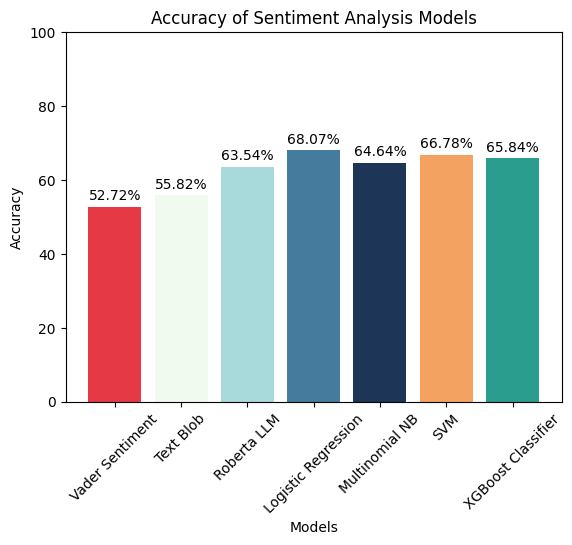

In [16]:
#Plotting the accuracies achieved so far for the different models used
models	=	['Vader Sentiment','Text Blob','Roberta LLM','Logistic Regression','Multinomial NB','SVM','XGBoost Classifier']
accuracies	=	[vader_sentiment_accuracy,text_blob_accuracy,Roberta_accuracy,accuracy_lr,accuracy_mnb,accuracy_svm,accuracy_xgb]		

#	Specify	a	color	for	each	bar
colors=['#E63946',	'#F1FAEE','#A8DADC','#457B9D','#1D3557','#F4A261','#2A9D8F']

#Drafting the actual plot
plt.bar(models,	accuracies,	color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Models')
plt.ylim(0,	100)		#	Set	the	y-axis	limits	to	0	and	100	for	accuracy	percentage
plt.xticks(rotation=45)		#	Rotate	x-axis	labels	if	needed

# Annotate each bar with its value
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

Sentiment Analysis using Deep Learning - Long Short-Term Memory (LSTM)
---

Data Loading

In [17]:
#Loading the raw sentiment data and understanding the dataset profiling

Feedback=pd.read_csv(r'D:\Documents\Dossiers du travail\Technical Excellence\Sentimental Analysis\data.csv')
df=pd.DataFrame(Feedback)
print(df.head())
print(df['Sentiment'].value_counts())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


Cleansing sentences data from undesirable characters

In [18]:
#Prepare a function to cleanse the sentences out of the undesirable characters and then preprocess the sentences for training

def	preprocess_text(text):
    #	Remove	mentions	(e.g.,	@username)
    text	=	re.sub(r'@\w+',	'',	text)
    #	Remove	emojis
    emoji_pattern	=	re.compile(
        "["
        "\U0001F600-\U0001F64F"		#	Emoticons
        "\U0001F300-\U0001F5FF"		#	Symbols	&	pictographs
        "\U0001F680-\U0001F6FF"		#	Transport	&	map	symbols
        "\U0001F700-\U0001F77F"		#	Alchemical	symbols
        "\U0001F780-\U0001F7FF"		#	Geometric	shapes
        "\U0001F800-\U0001F8FF"		#	Miscellaneous	Symbols	and	Arrows
        "\U0001F900-\U0001F9FF"		#	Supplemental	Symbols	and	Pictographs
        "\U0001FA00-\U0001FA6F"		#	Extended-A
        "\U0001FA70-\U0001FAFF"		#	Extended-B
        "\U00002702-\U000027B0"		#	Dingbats
        "\U000024C2-\U0001F251"
        "]+"
    )
    text	=	emoji_pattern.sub(r'',	text)
    #	Remove	other	special	characters	(keep	only	alphanumeric	and	spaces)
    text	=	re.sub(r'[^a-zA-Z0-9\s]',	'',	text)
    return	text.strip()
#	Apply	the	preprocessing	function	to	the	'sentence'	column
df['Sentence']	=	df['Sentence'].apply(preprocess_text)

#Display the end result of the cleansed text within the sentiment dataframe
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,ESI on lows down 150 to 250 BK a real possibility,negative
2,For the last quarter of 2010 Componenta s net...,positive
3,According to the FinnishRussian Chamber of Com...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [20]:
#The following step is optional and had no impact on my case.
# It tries to split the data by discarding the rows which have a number of words exceeding an arbitrary value.
#This can help the deep learning algorithm to understand the data quicker.


#Split the dataframe to include only rows which have 70 words in sentences or less
df	=	df[df['Sentence'].apply(lambda	x:	len(x.split())	<=	70)]
#	Resetting	the	index	after	dropping	rows
df.reset_index(drop=True,	inplace=True)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,ESI on lows down 150 to 250 BK a real possibility,negative
2,For the last quarter of 2010 Componenta s net...,positive
3,According to the FinnishRussian Chamber of Com...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,According shipping company Viking Line the EU...,neutral
5840,In the building and home improvement trade sa...,neutral


Tokenizing sentences, applying padding, lablling the encoder and then splitting the data into train and test sets

In [23]:
# Tokenizing the sentences column within the dataframe
tokenizer=	Tokenizer()
Sentences=	df['Sentence'].tolist()
tokenizer.fit_on_texts(Sentences)
sequences=	tokenizer.texts_to_sequences(Sentences)
print('The max length in Sentences is:',max([len(x)	for	x	in	sequences]))
print('The Unique word in the Sentences are:',len(tokenizer.word_index))

# Undertaking the padding process to make sure that the arrays generated after tokenization of words are always going to have the same length.
input_pad_sequences=pad_sequences(sequences,maxlen=70,padding='pre')
X=input_pad_sequences
y=df['Sentiment']

# label encoder
le=	LabelEncoder()
y=	le.fit_transform(y)
y=	to_categorical(y)

# train_test_split
X_train,	X_test,	y_train,	y_test	=	train_test_split(X,	y,	test_size=0.2,	random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

The max length in Sentences is: 52
The Unique word in the Sentences are: 12650
(4673, 70)
(1169, 70)
(4673, 3)
(1169, 3)


Building a sequential model, assigning layers and training it on the dataset.

In [39]:
#Importing an initializer  for initializing weights in a neural network
from	keras.initializers	import	glorot_normal 

#Initializing a sequential model which has stacks of layers. Every layer has exactly one input tensor and one output tensor
model	=	Sequential() 

#Embedding to convert words in vectors of fixed size(second argument) taking into account a vocabulary of a certain size(first argument)
model.add(Embedding(40758,200,input_length=70,embeddings_initializer=glorot_normal())) 

# Adds LSTM (Long Short-Term Memory) layers to the model. LSTM layers are a type of recurrent neural network (RNN) layer that are good at capturing long-term dependencies in sequence data. 
# Return_sequences=True means the output for each timestep is returned (necessary for stacking LSTM layers). 
# Dropout=0.6 is used for regularization to prevent overfitting by ignoring randomly selected neurons during training.
model.add(LSTM(100,return_sequences=True,dropout=0.6)) 
model.add(LSTM(100,return_sequences=True,dropout=0.6))
model.add(LSTM(100,return_sequences=True,dropout=0.6))
model.add(LSTM(100))

#Adding a Dropout layer that randomly sets a fraction (0.5) of input units to 0 at each update during training, which also helps in preventing overfitting.
model.add(Dropout(0.5))

# Adding a Dense layer (fully connected layer) with 3 units and a softmax activation function. 
# This is typically used as the output layer for multi-class classification problems 
model.add(Dense(3,activation='softmax'))

# Compiles the model with the Adam optimizer and categorical crossentropy loss function, which is appropriate for multi-class classification problems. 
# The model will use accuracy as the metric for evaluation.
model.compile(optimizer= 'adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

#	Model	Training by splitting the data into test and train
history	=model.fit(X_train,	y_train,epochs=2,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/2
147/147 [==============================] - 17s 94ms/step - loss: 0.9376 - accuracy: 0.5748 - val_loss: 0.8325 - val_accuracy: 0.6672
Epoch 2/2
147/147 [==============================] - 13s 88ms/step - loss: 0.6982 - accuracy: 0.7165 - val_loss: 0.7078 - val_accuracy: 0.6972


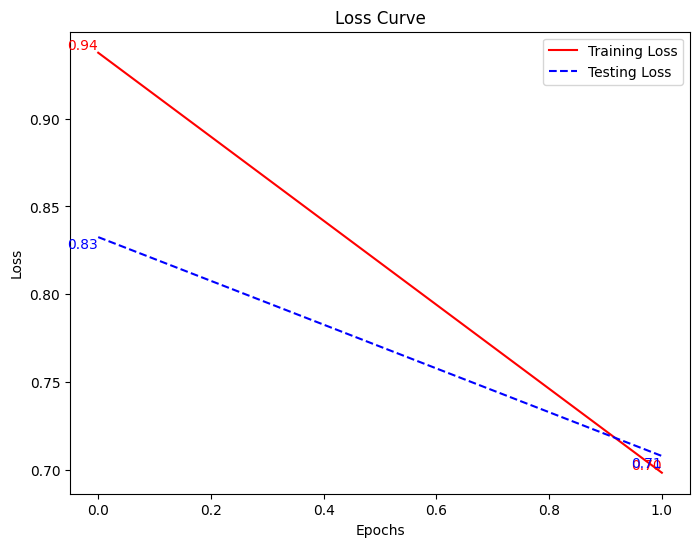

In [43]:
# Plotting the Loss Curves of the above learning process
plt.figure(figsize=(8,6))

#Plotting training loss
plt.plot(history.history['loss'],color='red')

#Plotting validation loss
plt.plot(history.history['val_loss'],ls='--',color='blue')

# Add data labels
for i, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    # # Annotate certain points, e.g., last point
    # if i == len(history.history['loss']) - 1:
    plt.text(i, loss, f'{loss:.2f}', ha='right', va='bottom', color='red')
    plt.text(i, val_loss, f'{val_loss:.2f}', ha='right', va='top', color='blue')

plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

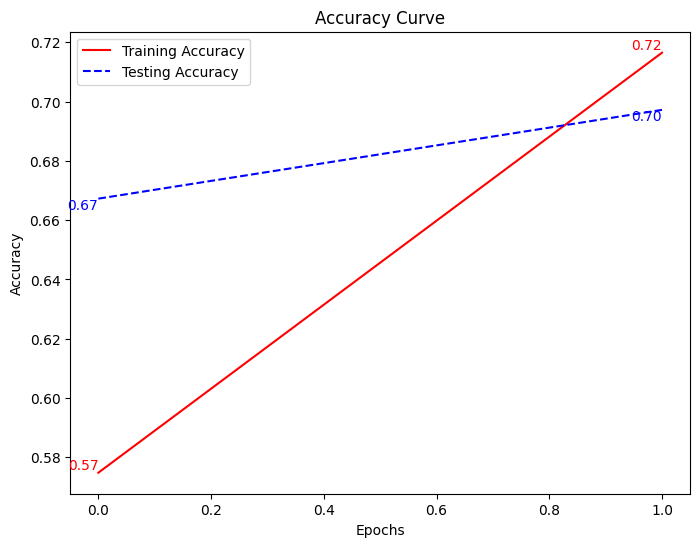

In [42]:
#Plotting the accuracy curves of the above learning process
plt.figure(figsize=(8,6))

#Plotting Training accuracy
plt.plot(history.history['accuracy'],color='red')

#Plotting Testing accuracy
plt.plot(history.history['val_accuracy'],ls='--',color='blue')

# Add data labels
for i, (acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy'])):
    # # Annotate certain points, e.g., last point
    # if i == len(history.history['accuracy']) - 1:
    plt.text(i, acc, f'{acc:.2f}', ha='right', va='bottom', color='red')
    plt.text(i, val_acc, f'{val_acc:.2f}', ha='right', va='top', color='blue')

plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()

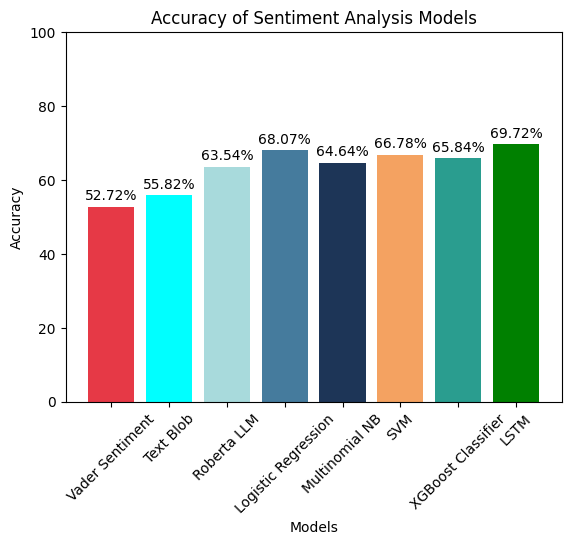

In [51]:
#Plotting the accuracies achieved so far for the different models used
models	=	['Vader Sentiment','Text Blob','Roberta LLM','Logistic Regression','Multinomial NB','SVM','XGBoost Classifier','LSTM']
LSTM_accuracy=history.history['val_accuracy'][-1]*100
accuracies	=	[vader_sentiment_accuracy,text_blob_accuracy,Roberta_accuracy,accuracy_lr,accuracy_mnb,accuracy_svm,accuracy_xgb,LSTM_accuracy]		


#	Specify	a	color	for	each	bar
colors=['#E63946',	'aqua','#A8DADC','#457B9D','#1D3557','#F4A261','#2A9D8F','green']

#Drafting the actual plot
plt.bar(models,	accuracies,	color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Models')
plt.ylim(0,	100)		#	Set	the	y-axis	limits	to	0	and	100	for	accuracy	percentage
plt.xticks(rotation=45)		#	Rotate	x-axis	labels	if	needed

# Annotate each bar with its value
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()